In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("linear_line-datas.csv")

In [3]:
df.head()

,x,y
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [4]:
df = df.rename(columns={"x":"height", "y": "weight"})

In [5]:
df.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [6]:
df.describe()

,height,weight
count,100.000000,100.000000
mean,5.372901,19.463537
std,2.662962,8.798315
min,1.001029,-0.007462
25%,2.888507,11.759102
50%,5.236684,19.541428
75%,7.495686,26.635032
max,9.899750,35.239938


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
 1   weight  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.shape

(100, 2)

In [9]:
df.isna().sum()

height    0
weight    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, '<----value of weight---->')

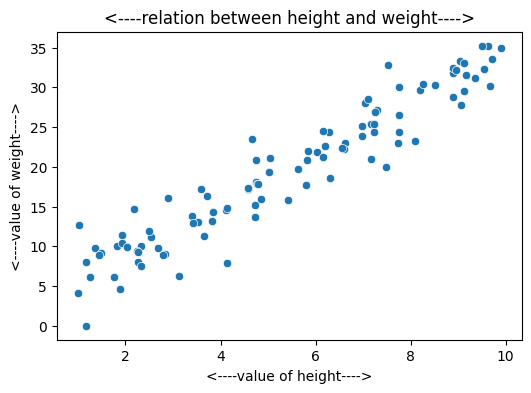

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="height",y="weight", data=df)
plt.title("<----relation between height and weight---->")
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")


In [15]:
df.corr()

,height,weight
height,1.000000,0.951881
weight,0.951881,1.000000


<Axes: >

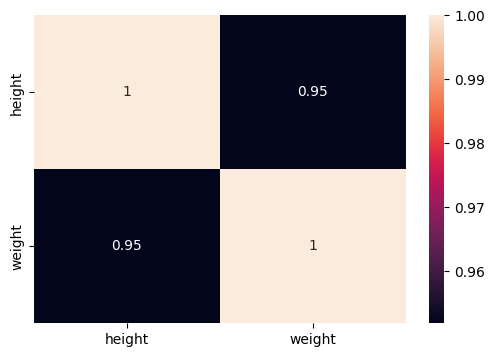

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)

In [17]:
x = df[["height"]]
y= df[["weight"]]

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2, random_state=42)

In [19]:
lr = LinearRegression()

In [20]:
model = lr.fit(xtrain,ytrain)

In [21]:
model.score(xtrain,ytrain)

0.9019703807046385

In [22]:
model.score(xtest,ytest)

0.9115838735608328

In [24]:
pred_y = model.predict(xtest)
pred_y

array([[15.82343627],
       [13.505469  ],
       [31.24389442],
       [18.57644124],
       [ 8.99141543],
       [26.98187967],
       [14.83691808],
       [30.68503993],
       [17.77833654],
       [17.71792017],
       [10.02484177],
       [ 8.85572816],
       [28.57388846],
       [20.94780484],
       [ 9.31177975],
       [10.20195904],
       [31.91428834],
       [15.79194252],
       [11.806465  ],
       [17.83153916]])

In [25]:
df.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


In [27]:
df["prediction"] = model.predict(df[["height"]])

In [28]:
df.head()

,height,weight,prediction
0,4.753198,18.144798,17.717920
1,7.482920,20.002888,26.152606
2,1.001029,4.084733,6.123934
3,3.720993,16.327152,14.528466
4,2.320803,9.982894,10.201959


In [29]:
df["error"] = df["weight"] - df["prediction"]

In [30]:
df.head()

,height,weight,prediction,error
0,4.753198,18.144798,17.717920,0.426878
1,7.482920,20.002888,26.152606,-6.149718
2,1.001029,4.084733,6.123934,-2.039201
3,3.720993,16.327152,14.528466,1.798685
4,2.320803,9.982894,10.201959,-0.219065


In [31]:
mae = mean_absolute_error(ytest,pred_y)
mae

1.8057942950291186

In [32]:
mse = mean_squared_error(ytest, pred_y)
mse

6.526959451345064

In [33]:
r_score = r2_score(ytest,pred_y)
r_score

0.9115838735608328

In [34]:
m = model.coef_
m

array([[3.08994265]])

In [35]:
c = model.intercept_
c

array([3.03081082])

In [36]:
y = m * 50 + c
y

array([[157.52794319]])

Text(0, 0.5, '<----value of weight---->')

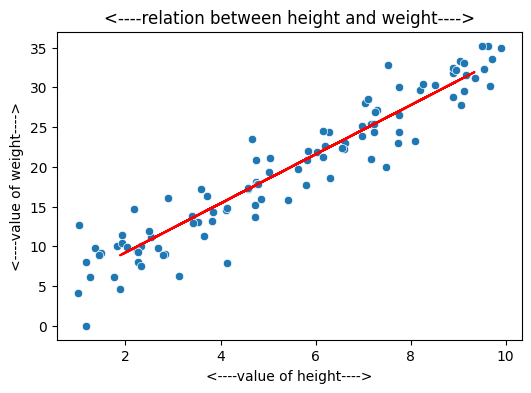

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="height",y="weight", data=df)
plt.plot(xtest,pred_y,color = "r")
plt.title("<----relation between height and weight---->")
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")
